# **SIMPLE LINEAR REGRESSION**
### Starting my *First Project* of the course

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


### A correlation value of **0.931142** shows a *strong positive linear relationship* between the 2 variables

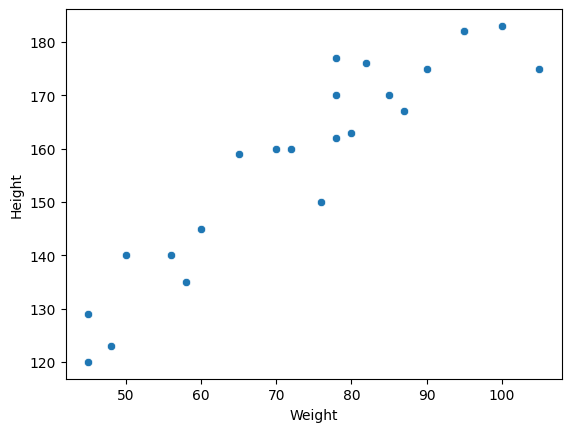

In [10]:
sns.scatterplot(x = df["Weight"], y = df["Height"]);

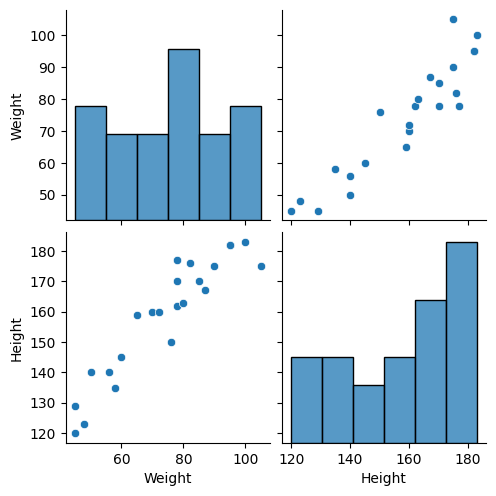

In [12]:
sns.pairplot(df);

In [16]:
#Splitting into dependent and independent variables
X = df[["Weight"]] # Double brackets ensure that this variable is stored as a DATAFRAME and NOT a SERIES
Y = df["Height"] # Single brackets indicate that this variable is stored as a SERIES or a SINGLE DIM ARRAY
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


### `train_test_split`

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.25, random_state=42)

### *Standardization*

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

### We use `fit_transform` for the **training dataset** but only `transform` for the **test datset** as we want to use the mean of the training dataset to standardise the test dataset as well 

In [53]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_Train)
Y_Pred = regression.predict(X_test)
print(Y_Pred)

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [26]:
## coefficient and intercepts
print("Coefficient : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient :  [1.04792503]
Intercept :  80.52684512622542


### Plotting the **Training Data's** *Best Fit Line*

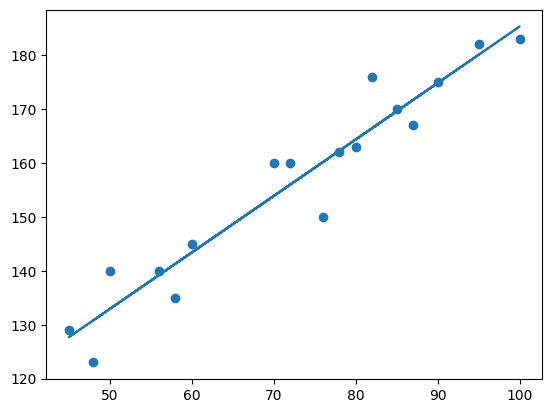

In [30]:
plt.scatter(X_train,Y_Train)
plt.plot(X_train,regression.predict(X_train));

### Importing all the **Performance Metrics** such as `MSE` `MAE` 

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(Y_Test, Y_Pred)
MSE = mean_squared_error(Y_Test, Y_Pred)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE) # Outliers have been punished !
print(RMSE)

9.665125886795005
114.84069295228686
10.7163749912126


In [33]:
from sklearn.metrics import r2_score
score = r2_score(Y_Test, Y_Pred)
print(score)

0.7360826717981279


### Performing `OLS Linear Regression`

In [37]:
import statsmodels.api as sm 
model = sm.OLS(Y_Train,X_train).fit()

In [39]:
Y_Pred_OLS = model.predict(X_test)
print(Y_Pred_OLS)

15    164.134205
9     164.134205
0      94.692811
8     199.907045
17    136.778504
12    220.949891
dtype: float64


In [40]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):                    2.80e-16
Time:                        01:11:46   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Predicting **New** *Data*

In [45]:
regression.predict(scaler.transform([[72]]))

c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.49697064])